<a href="https://colab.research.google.com/github/Average-Me/weather-temperature-forecast-finland/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/projectx/trim_data.csv'

df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,month,day,hour,day_of_week,Temperature (C)
0,2006,3,31,22,4,9.472222
1,2006,3,31,23,4,9.355556
2,2006,4,1,0,5,9.377778
3,2006,4,1,1,5,8.288889
4,2006,4,1,2,5,8.755556
...,...,...,...,...,...,...
96448,2016,9,9,17,4,26.016667
96449,2016,9,9,18,4,24.583333
96450,2016,9,9,19,4,22.038889
96451,2016,9,9,20,4,21.522222


In [25]:
features = ['year', 'month', 'day', 'hour', 'day_of_week']
X = df[features]
y = df['Temperature (C)']

print("Признаки для обучения:")
print(X.head())
print(f"Размер X: {X.shape}")

Признаки для обучения:
   year  month  day  hour  day_of_week
0  2006      3   31    22            4
1  2006      3   31    23            4
2  2006      4    1     0            5
3  2006      4    1     1            5
4  2006      4    1     2            5
Размер X: (96453, 5)


In [26]:
train_size = int(len(df)*0.8)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
print(len(X_train))
print(len(X_test))

77162
19291


In [27]:
model = RandomForestRegressor(
    n_estimators = 50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
print("Обучение модели")
model.fit(X_train, y_train)

# Предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Обучение модели


In [28]:
#Считаем ошибку
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("РЕЗУЛЬТАТЫ")
print(f"Ошибка на обучении: {train_mae:.2f}°C")
print(f"Ошибка на тесте:    {test_mae:.2f}°C")

РЕЗУЛЬТАТЫ
Ошибка на обучении: 2.47°C
Ошибка на тесте:    3.73°C


In [29]:
importance = pd.DataFrame({
    'Признак': features,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)
print(importance)

       Признак  Важность
1        month  0.778891
3         hour  0.123128
0         year  0.047066
2          day  0.046003
4  day_of_week  0.004912


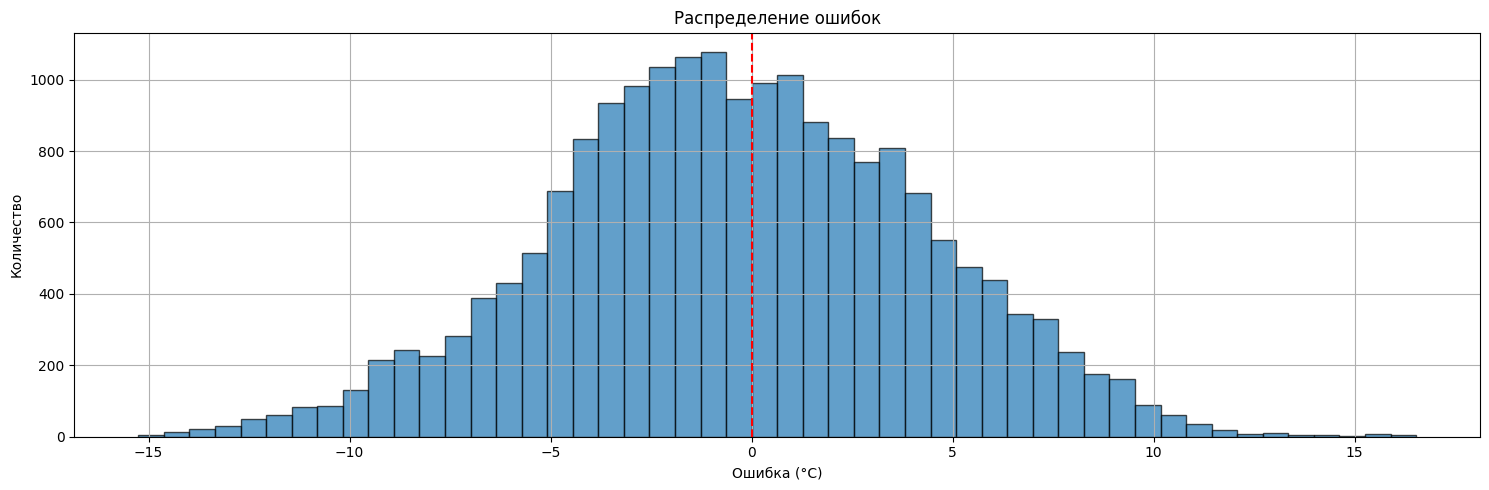

In [30]:
#Сравнение реальных и предсказанных значений
fig, axes = plt.subplots(figsize=(15, 5))

# Распределение ошибок
errors = y_test - y_pred_test
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Ошибка (°C)')
plt.ylabel('Количество')
plt.title('Распределение ошибок')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

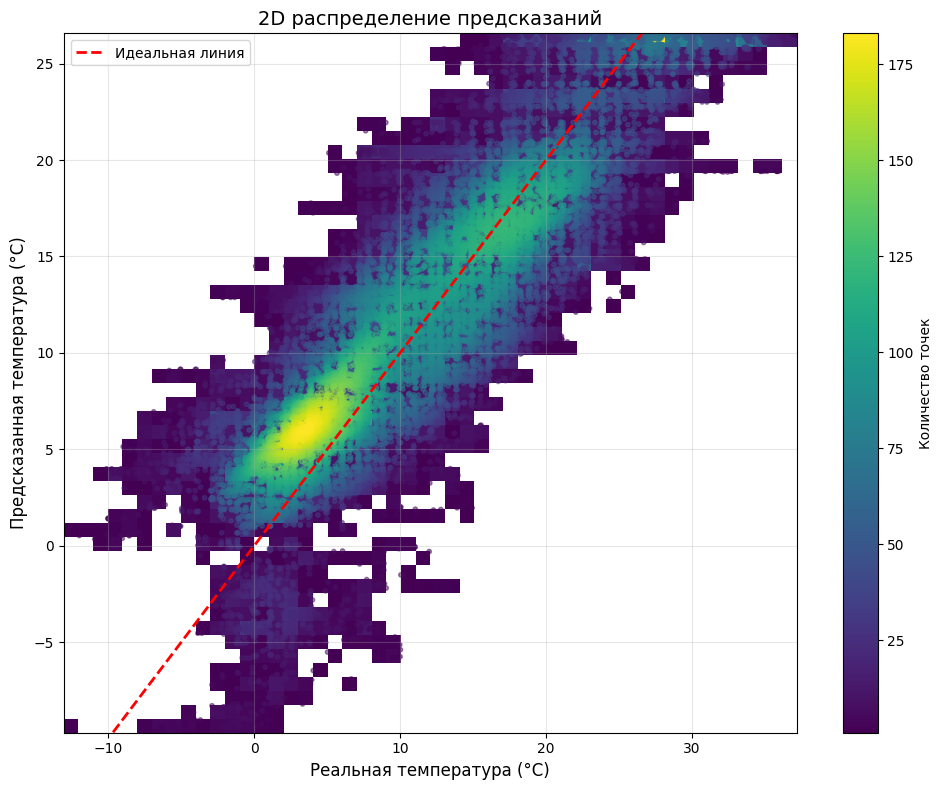

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

h = ax.hist2d(y_test, y_pred_test, bins=50, cmap='viridis', cmin=1)
ax.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--', lw=2, label='Идеальная линия')


from scipy.stats import gaussian_kde
xy = np.vstack([y_test, y_pred_test])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
ax.scatter(y_test.iloc[idx], y_pred_test[idx],
           c=z[idx], s=10, cmap='viridis', alpha=0.5)

ax.set_xlabel('Реальная температура (°C)', fontsize=12)
ax.set_ylabel('Предсказанная температура (°C)', fontsize=12)
ax.set_title('2D распределение предсказаний', fontsize=14)
plt.colorbar(h[3], ax=ax, label='Количество точек')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()